In [1]:
import captum 
import torch
import optuna
import cv2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from torchvision import transforms

from sklearn.model_selection import train_test_split

from skimage.segmentation import slic, mark_boundaries

from captum.attr import visualization as viz

from optuna_funcs import load_data, objective
from cnn import CNN, ResNet, CNNTransferLearning

Loading data.

In [2]:
baseline = torch.load('../best_models/feijao_baseline.pth', map_location='cpu', weights_only=True)
plantvillage_da = torch.load('../best_models/feijao_plantvillage_domain_adaptation.pth', map_location='cpu', weights_only=True)
plantvillage_ft = torch.load('../best_models/feijao_plantvillage_fine_tuning.pth', map_location='cpu', weights_only=True)
resnet_da = torch.load('../best_models/feijao_resnet_domain_adaptation.pth', map_location='cpu', weights_only=True)
resnet_ft = torch.load('../best_models/feijao_resnet_fine_tuning.pth', map_location='cpu', weights_only=True)

In [3]:
SEED = 42
images, labels, names = load_data(name='feijao', root="../../../digipathos/")

TEST_SIZE = 0.1

x, y = images.numpy(), labels.numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_SIZE, stratify=y, random_state=SEED)
names_train, names_test = train_test_split(names, test_size=TEST_SIZE, stratify=names, random_state=SEED)

x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

test_transforms = transforms.Compose([
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

x_test = test_transforms(x_test)

In [4]:
attrs = torch.load('attributions/kernelshap.pth', map_location='cpu', weights_only=True)

# KernelSHAP

In [5]:
def deprocess_image(tensor):
    img_np = tensor.squeeze().permute(1, 2, 0).detach().cpu().numpy()
    img_np = (img_np - np.min(img_np)) / (np.max(img_np) - np.min(img_np))
    img_np = np.uint8(255 * img_np)
    return img_np

## Baseline

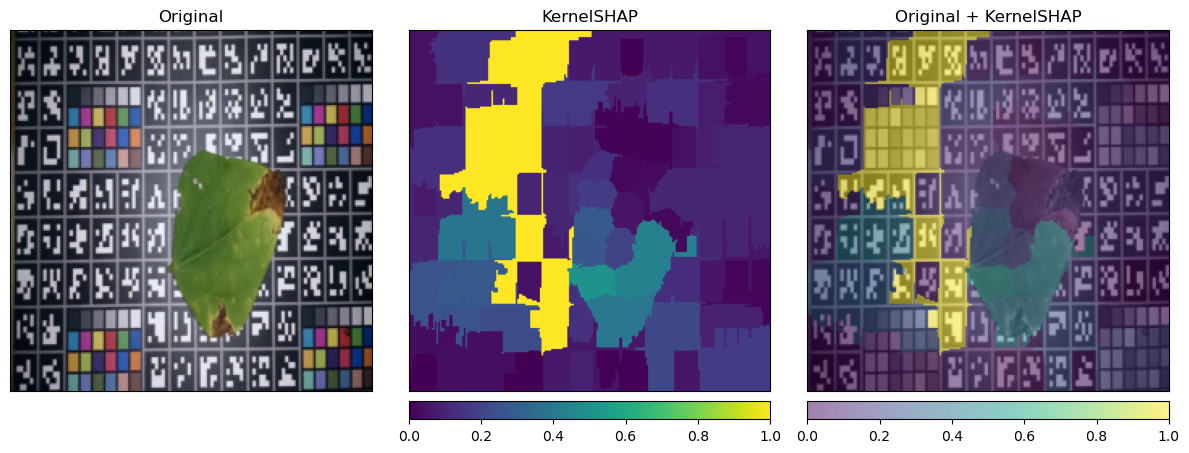

In [6]:
idx = 3

original_im = deprocess_image(x_test[idx])
out = attrs['baseline']

_ = viz.visualize_image_attr_multiple(
    np.transpose(out[idx].squeeze().cpu().detach().numpy(), (1, 2, 0)),
    np.transpose(original_im.squeeze(), (0, 1, 2)), 
    ["original_image", "heat_map", "blended_heat_map"],
    ["all", "absolute_value", "absolute_value"],
    titles=['Original', 'KernelSHAP', 'Original + KernelSHAP'],
    cmap='viridis',
    show_colorbar=True,
    fig_size=(12, 10)
)

## PlantVillage-DA

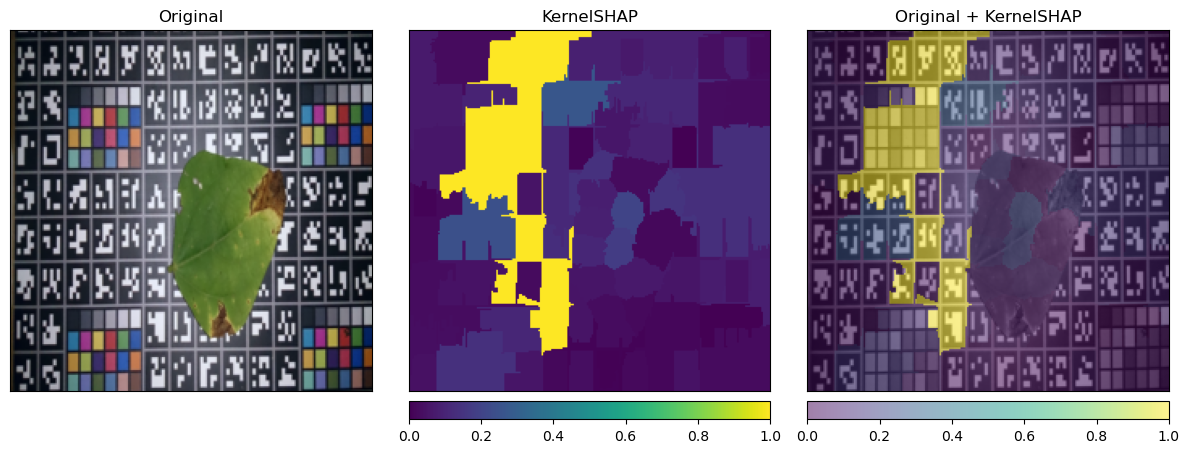

In [7]:
idx = 3

original_im = deprocess_image(x_test[idx])
out = attrs['plantvillage_da']

_ = viz.visualize_image_attr_multiple(
    np.transpose(out[idx].squeeze().cpu().detach().numpy(), (1, 2, 0)),
    np.transpose(original_im.squeeze(), (0, 1, 2)), 
    ["original_image", "heat_map", "blended_heat_map"],
    ["all", "absolute_value", "absolute_value"],
    titles=['Original', 'KernelSHAP', 'Original + KernelSHAP'],
    cmap='viridis',
    show_colorbar=True,
    fig_size=(12, 10)
)

## PlantVillage-FT

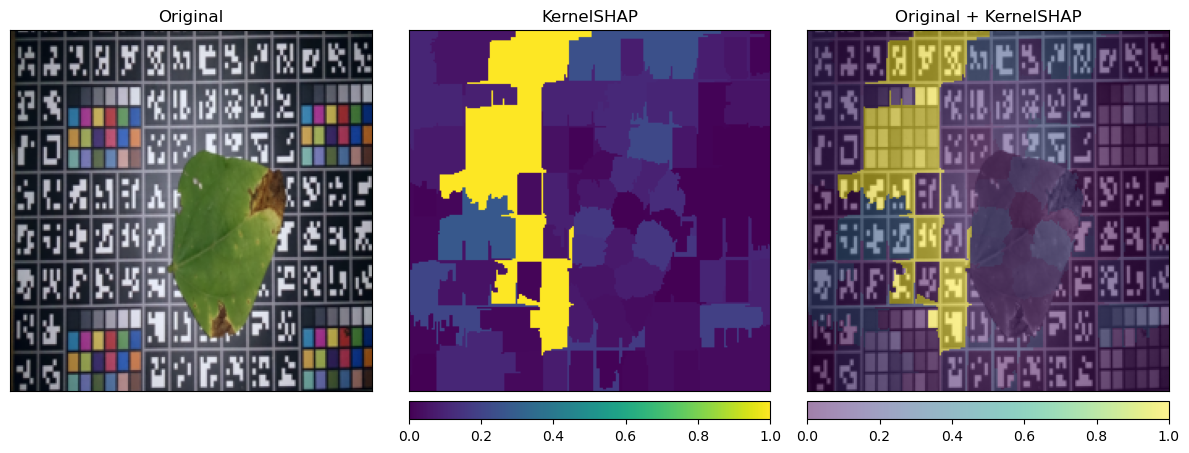

In [8]:
idx = 3

original_im = deprocess_image(x_test[idx])
out = attrs['plantvillage_ft']

_ = viz.visualize_image_attr_multiple(
    np.transpose(out[idx].squeeze().cpu().detach().numpy(), (1, 2, 0)),
    np.transpose(original_im.squeeze(), (0, 1, 2)), 
    ["original_image", "heat_map", "blended_heat_map"],
    ["all", "absolute_value", "absolute_value"],
    titles=['Original', 'KernelSHAP', 'Original + KernelSHAP'],
    cmap='viridis',
    show_colorbar=True,
    fig_size=(12, 10)
)

## ResNet50-DA

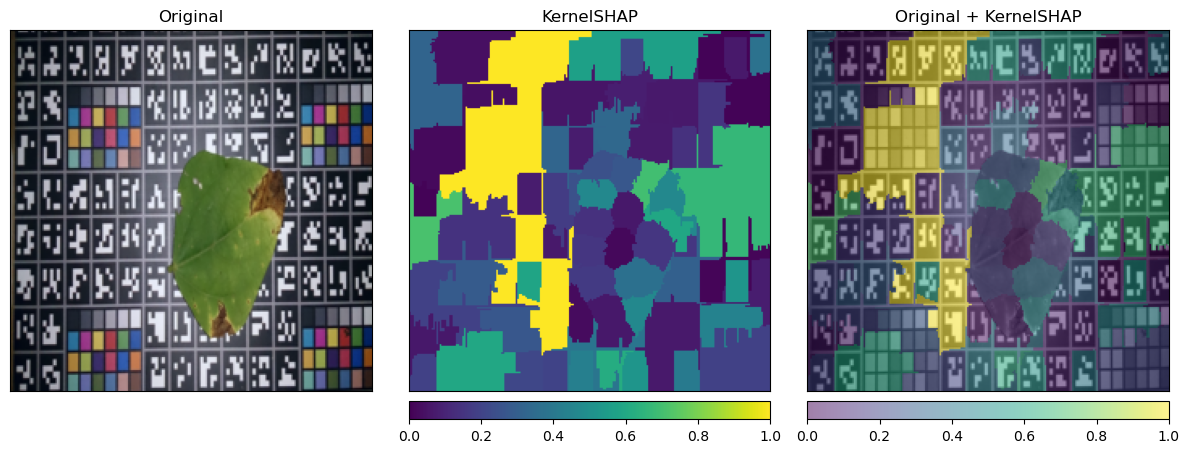

In [9]:
idx = 3

original_im = deprocess_image(x_test[idx])
out = attrs['resnet_da']

_ = viz.visualize_image_attr_multiple(
    np.transpose(out[idx].squeeze().cpu().detach().numpy(), (1, 2, 0)),
    np.transpose(original_im.squeeze(), (0, 1, 2)), 
    ["original_image", "heat_map", "blended_heat_map"],
    ["all", "absolute_value", "absolute_value"],
    titles=['Original', 'KernelSHAP', 'Original + KernelSHAP'],
    cmap='viridis',
    show_colorbar=True,
    fig_size=(12, 10)
)

## ResNet50-FT

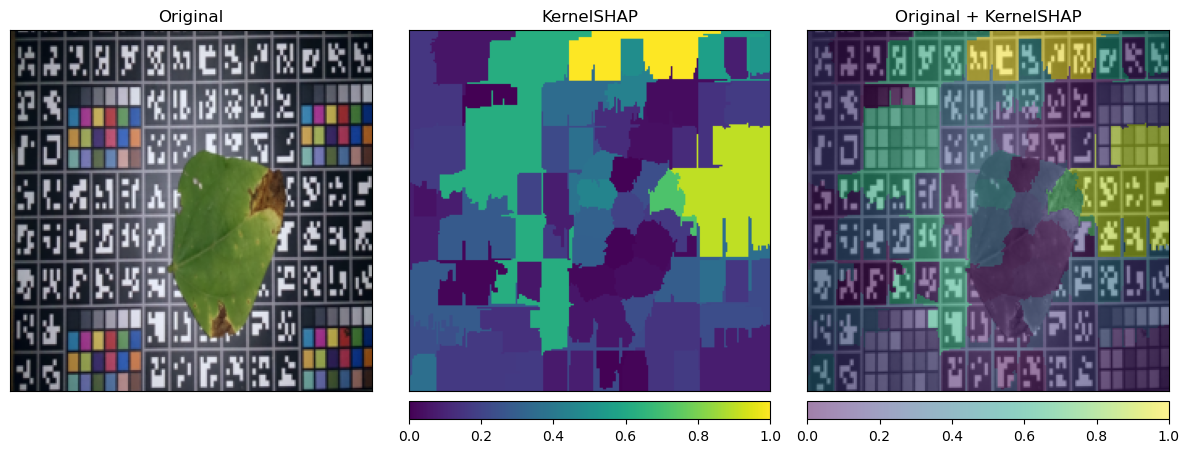

In [10]:
idx = 3

original_im = deprocess_image(x_test[idx])
out = attrs['resnet_ft']

_ = viz.visualize_image_attr_multiple(
    np.transpose(out[idx].squeeze().cpu().detach().numpy(), (1, 2, 0)),
    np.transpose(original_im.squeeze(), (0, 1, 2)), 
    ["original_image", "heat_map", "blended_heat_map"],
    ["all", "absolute_value", "absolute_value"],
    titles=['Original', 'KernelSHAP', 'Original + KernelSHAP'],
    cmap='viridis',
    show_colorbar=True,
    fig_size=(12, 10)
)